# General Notes

* Every student + meal combination was ran through the algorithm
* Combinations were grouped by
    * Sex
    * Algorithm choice
    * Meal day + time
* Deltas are averaged out over entire group
    * Nan=0

Notion page of metrics: https://www.notion.so/weplate/Cafeteria-Management-System-d51d6976bf2d4cc7b73f06fc9a7ca77c

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('female_male_summary_fixed_1.csv')
df_item = pd.read_csv('nutrition_table.csv')

label_lim = [l for l in df.columns if '_lim' in l]
label_delta = [l for l in df.columns if '_delta' in l]

print(f'Limit Labels: {label_lim}\n')
print(f'Delta Labels: {label_delta}\n')
print(df.columns)

Limit Labels: ['protein_lim', 'carbohydrate_lim', 'calories_lim', 'total_fat_lim', 'saturated_fat_lim', 'sodium_lim', 'calcium_lim', 'iron_lim', 'vitamin_a_lim', 'vitamin_c_lim', 'vitamin_d_lim', 'sugar_lim', 'cholesterol_lim', 'fiber_lim', 'potassium_lim']

Delta Labels: ['protein_delta', 'carbohydrate_delta', 'calories_delta', 'total_fat_delta', 'saturated_fat_delta', 'sodium_delta', 'calcium_delta', 'iron_delta', 'vitamin_a_delta', 'vitamin_c_delta', 'vitamin_d_delta', 'sugar_delta', 'cholesterol_delta', 'fiber_delta', 'potassium_delta']

Index(['Date', 'Name', 'Num_Unique_Combinations', 'Combination',
       'Student_Number', 'Sex', 'Height', 'Weight', 'Health_Goal', 'Activity',
       'protein', 'carbohydrate', 'calories', 'total_fat', 'saturated_fat',
       'sodium', 'calcium', 'iron', 'vitamin_a', 'vitamin_c', 'vitamin_d',
       'sugar', 'cholesterol', 'fiber', 'potassium', 'protein_lim',
       'carbohydrate_lim', 'calories_lim', 'total_fat_lim',
       'saturated_fat_lim', '

# Male and Female Samples
* Example male (with traits)
* Example female (with traits)
* Nutrient limits for male
* Nutrient limits for female

In [3]:
# Limit examples with male and female

rand_male = df[df['Sex'] == 'MALE'].sample()
rand_female = df[df['Sex'] == 'FEMALE'].sample()

label_student = ['Student_Number', 'Sex', 'Height', 'Weight', 'Health_Goal', 'Activity']

In [4]:
rand_male.get(label_student)

,Student_Number,Sex,Height,Weight,Health_Goal,Activity
100403,27,MALE,170.642784,89.306815,improve_health,heavy


In [5]:
rand_male.get(label_lim)

,protein_lim,carbohydrate_lim,calories_lim,total_fat_lim,saturated_fat_lim,sodium_lim,calcium_lim,iron_lim,vitamin_a_lim,vitamin_c_lim,vitamin_d_lim,sugar_lim,cholesterol_lim,fiber_lim,potassium_lim
100403,"[23.815150786666667, 29.768938483333333]","[148.84469241666667, 178.6136309]","[1060.4794972715802, 1434.7663786615494]","[6.666666666666667, 8.333333333333334]","[0, 3.3333333333333335]","[500.0, 1333.3333333333333]","[333.3333333333333, 833.3333333333334]","[2.6666666666666665, 15.0]","[1000.0, 3333.3333333333335]","[30.0, 666.6666666666666]","[200.0, 1333.3333333333333]","[0, 9.0]","[0, 100.0]","[10.0, 333333.3333333333]","[1000.0, 333333.3333333333]"


In [6]:
rand_female.get(label_student)

,Student_Number,Sex,Height,Weight,Health_Goal,Activity
90338,23,FEMALE,158.53428,64.209725,build_muscle,heavy


In [7]:
rand_female.get(label_lim)

,protein_lim,carbohydrate_lim,calories_lim,total_fat_lim,saturated_fat_lim,sodium_lim,calcium_lim,iron_lim,vitamin_a_lim,vitamin_c_lim,vitamin_d_lim,sugar_lim,cholesterol_lim,fiber_lim,potassium_lim
90338,"[32.10486264, 38.525835168]","[128.41945056, 141.261395616]","[839.2026824986389, 1135.391864556982]","[10.0, 11.666666666666666]","[0, 3.3333333333333335]","[500.0, 1333.3333333333333]","[333.3333333333333, 833.3333333333334]","[2.6666666666666665, 15.0]","[1000.0, 3333.3333333333335]","[30.0, 666.6666666666666]","[200.0, 1333.3333333333333]","[0, 9.0]","[0, 100.0]","[10.0, 333333.3333333333]","[1000.0, 333333.3333333333]"


# Valid Combinations
* Graph number of combinations (y-axis) with X nutrients inside range (x-axis)
* Nutrients (x-axis), Number of times it’s within range (out of total) (y-axis)

Total # of Combinations: 186966
Total # of nutrients: 15


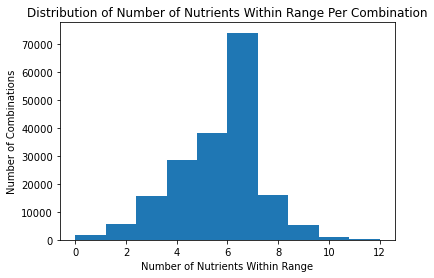

In [8]:
fig, ax = plt.subplots()

# redefine num_meet
n_count = len(label_lim)  # number of nutrients
df['Num_Meet'] = [n_count - a - b for a, b in zip(df['Num_Deficit'], df['Num_Surplus'])]

ax.hist(df['Num_Meet'])
ax.set_xlabel('Number of Nutrients Within Range')
ax.set_ylabel('Number of Combinations')
ax.set_title('Distribution of Number of Nutrients Within Range Per Combination')

print(f'Total # of Combinations: {len(df)}')
print(f'Total # of nutrients: {n_count}')

Total # of Combinations: 186966


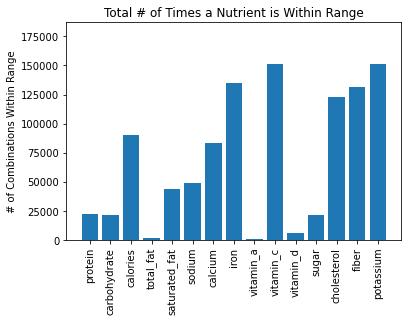

In [9]:
df_count_by_n = pd.DataFrame(((n[:-6], df[n].isna().sum()) for n in label_delta))
plt.axes(title='Total # of Times a Nutrient is Within Range',
         ylabel='# of Combinations Within Range',
         ylim=(0, len(df)))
plt.xticks(rotation=90)
plt.bar(df_count_by_n[0], df_count_by_n[1])

print(f'Total # of Combinations: {len(df)}')

Total # of Combinations: 186966


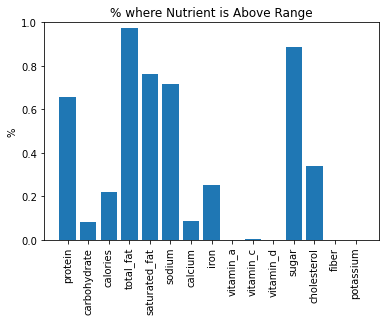

In [10]:
df_count_by_n = pd.DataFrame(((n[:-6], (df[n] > 0).sum() / len(df)) for n in label_delta))
plt.axes(title='% where Nutrient is Above Range',
         ylabel='%',
         ylim=(0, 1))
plt.xticks(rotation=90)
plt.bar(df_count_by_n[0], df_count_by_n[1])

print(f'Total # of Combinations: {len(df)}')

Total # of Combinations: 186966


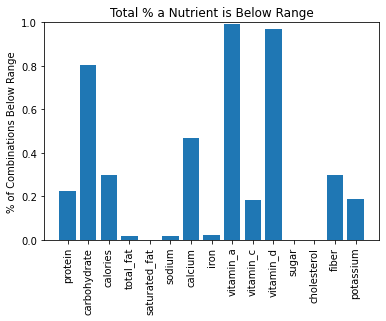

In [11]:
df_count_by_n = pd.DataFrame(((n[:-6], (df[n] < 0).sum() / len(df)) for n in label_delta))
plt.axes(title='Total % a Nutrient is Below Range',
         ylabel='% of Combinations Below Range',
         ylim=(0, 1))
plt.xticks(rotation=90)
plt.bar(df_count_by_n[0], df_count_by_n[1])

print(f'Total # of Combinations: {len(df)}')

# Menu Score

## Valid Combination Calculation


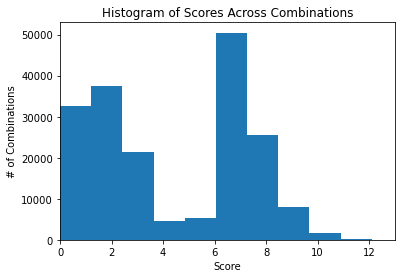

In [12]:
import math

label_macro = [
    'protein_delta', 'carbohydrate_delta', 'calories_delta', 'total_fat_delta', 'saturated_fat_delta'
]
label_micro = [
    'sodium_delta', 'calcium_delta', 'iron_delta',
    'vitamin_a_delta', 'vitamin_c_delta', 'vitamin_d_delta', 'sugar_delta',
    'cholesterol_delta', 'fiber_delta', 'potassium_delta'
]

CAL_WEIGHT = 4
MACRO_WEIGHT = 6 / len(label_macro)
MICRO_WEIGHT = 3 / len(label_micro)

def score(row):
    return math.isnan(row['calories_delta']) * CAL_WEIGHT + \
            sum(math.isnan(row[n]) for n in label_macro) * MACRO_WEIGHT + \
            sum(math.isnan(row[n]) for n in label_micro) * MICRO_WEIGHT

max_score = 4 + 6 + 3

df['score'] = df.apply(score, axis=1)

plt.axes(title='Histogram of Scores Across Combinations',
         xlabel='Score', ylabel='# of Combinations',
         xlim=(0, max_score))
plt.hist(df['score'])
plt.show()

In [13]:
print(f'max possible score: {max_score}')

QUANTILES = [0.5, 0.75, 0.8, 0.85, 0.9, 0.95]
df_quantiles = df.sort_values('score').quantile(QUANTILES)

print('Below, some quantiles score (i.e. last row is 95th percentile of scores, and a combination that is on that edge (around exactly 95th percentile)')
df_quantiles

max possible score: 13
Below, some quantiles score (i.e. last row is 95th percentile of scores, and a combination that is on that edge (around exactly 95th percentile)


,Num_Unique_Combinations,Student_Number,Height,Weight,protein,carbohydrate,calories,total_fat,saturated_fat,sodium,...,vitamin_c_delta,vitamin_d_delta,sugar_delta,cholesterol_delta,fiber_delta,potassium_delta,Num_Deficit,Num_Surplus,Num_Meet,score
0.50,146.0,25.0,166.512837,81.513243,38.883284,117.113191,938.634539,34.204050,7.000000,1853.013204,...,-11.325152,-195.000000,13.345346,70.000000,-2.607600,-233.173133,4.0,5.0,6.0,4.2
0.75,189.0,38.0,173.668894,90.723626,52.964310,145.773304,1103.768970,45.701628,11.961788,2537.146798,...,-5.964194,-180.000000,23.543042,183.440345,-1.190075,-103.482117,5.0,6.0,7.0,6.7
0.80,207.0,40.0,175.062621,92.265567,56.335258,152.105024,1147.170606,49.111287,13.174748,2733.613554,...,-4.703309,-173.372013,26.402920,239.218165,-0.986637,-77.536214,6.0,6.0,7.0,7.0
0.85,215.0,43.0,175.921293,95.191023,61.020906,159.862576,1200.496733,53.607087,15.000000,3011.476125,...,-3.469642,-165.000000,31.441902,397.055465,-0.732897,-58.086606,6.0,7.0,7.0,7.6
0.90,237.0,45.0,178.150434,97.085163,67.409690,170.550594,1275.955828,58.985481,17.500000,3403.832991,...,-2.140186,-149.342507,38.179922,522.433847,-0.570027,-36.940406,7.0,7.0,8.0,7.9
0.95,268.0,48.0,181.165948,100.263728,79.855365,186.960053,1392.086715,67.756520,21.125425,4166.400239,...,-0.942851,-100.000000,48.500000,1289.225165,-0.291111,-17.322710,8.0,8.0,8.0,8.5


In [14]:
VALID_COMBINATION_SCORE = 7.9
print(f'We set the min score for a valid combination to be {VALID_COMBINATION_SCORE}')

df['is_valid'] = df['score'] >= VALID_COMBINATION_SCORE

We set the min score for a valid combination to be 7.9


# Valid Combination Graphs
* Histogram of # of Valid Combinations of Meals
    * Histogram for different meal categories
    * Example ratio of combinations for a breakfast, lunch, dinner (choose the worst ones)
        * Alex please get the costs later
    * Most common out of range nutrients
    * num of combinations for different meal categories

(array([28., 14., 15., 15.,  4.,  6.,  1.,  0.,  2.,  1.]),
 array([   0. ,  125.9,  251.8,  377.7,  503.6,  629.5,  755.4,  881.3,
        1007.2, 1133.1, 1259. ]),
 <BarContainer object of 10 artists>)

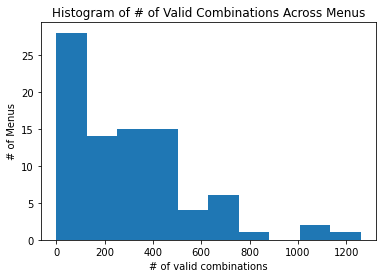

In [15]:
df['category'] = df['Name'].map(lambda x: x.split()[0].lower())

df_valid = df.where(df['category'] != 'afterlunch') \
             .get(['Name', 'is_valid']) \
             .groupby('Name').sum()

plt.axes(title='Histogram of # of Valid Combinations Across Menus',
         xlabel='# of valid combinations',
         ylabel='# of Menus')
plt.hist(df_valid)

In [16]:
print('Below are some of the \'best\' menus (menus with most # of valid combinations)')
df_valid.sort_values('is_valid', ascending=False) \
        .merge(df.get(['Name', 'Num_Unique_Combinations']).drop_duplicates(), on='Name', how='left') \
        .head()

Below are some of the 'best' menus (menus with most # of valid combinations)


,Name,is_valid,Num_Unique_Combinations
0,"Dinner on Friday, March 25, 2022",1259,430
1,"Dinner on Wednesday, March 23, 2022",1100,306
2,"Dinner on Friday, March 11, 2022",1016,156
3,"Dinner on Thursday, March 17, 2022",798,327
4,"Dinner on Friday, April 01, 2022",717,162


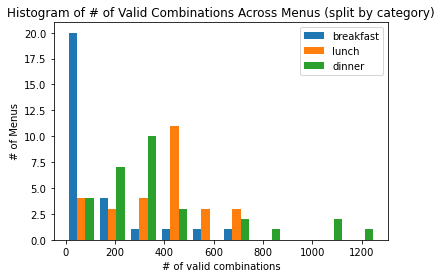

In [17]:
CATEGORIES = ['breakfast', 'lunch', 'dinner']

values = []
for category in CATEGORIES:
    df_valid = df.where(df['category'] == category) \
             .get(['Name', 'is_valid']) \
             .groupby('Name').sum()['is_valid']
    values.append(df_valid)

plt.axes(title='Histogram of # of Valid Combinations Across Menus (split by category)',
         xlabel='# of valid combinations',
         ylabel='# of Menus')
plt.hist(values, label=CATEGORIES)
plt.legend(prop={'size': 10})

In [18]:
print(f'Average number of (total) combinations across categories')
df_category_avg = df.get(['Name', 'Num_Unique_Combinations', 'category']) \
  .drop_duplicates() \
  .get(['Num_Unique_Combinations', 'category']) \
  .groupby('category') \
  .mean()
df_category_avg

Average number of (total) combinations across categories


,Num_Unique_Combinations
category,
afterlunch,27.454545
breakfast,56.892857
dinner,196.400000
lunch,113.357143


Mean of breakfast: 2.1870684243565597
Mean of lunch: 3.282923755513547
Mean of dinner: 1.99847250509165


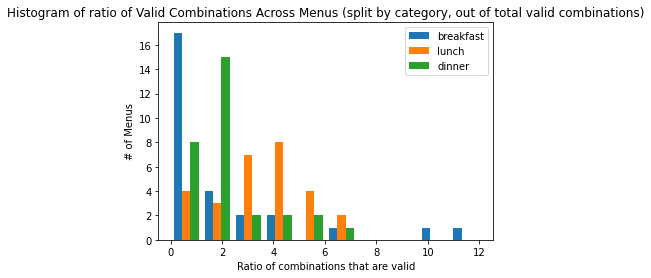

In [19]:
CATEGORIES = ['breakfast', 'lunch', 'dinner']

values = []
for category in CATEGORIES:
    category_avg = df_category_avg.loc[category]['Num_Unique_Combinations']
    df_valid = df.where(df['category'] == category) \
             .get(['Name', 'is_valid']) \
             .groupby('Name').sum()['is_valid'] \
             .map(lambda x: x / category_avg)
    values.append(df_valid)

plt.axes(title='Histogram of ratio of Valid Combinations Across Menus (split by category, out of total valid combinations)',
         xlabel='Ratio of combinations that are valid',
         ylabel='# of Menus')
plt.hist(values, label=CATEGORIES)
plt.legend(prop={'size': 10})

for df_cur, category in zip(values, CATEGORIES):
    print(f'Mean of {category}: {df_cur.mean()}')

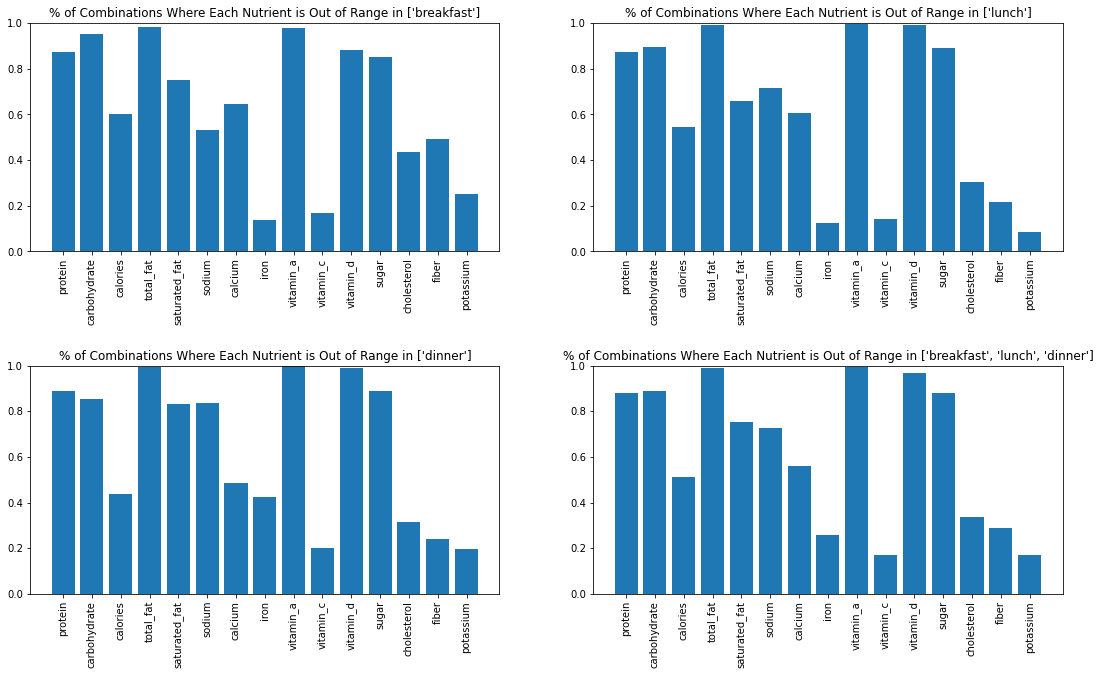

In [20]:
import itertools

fig, ((a0, a1), (a2, a3)) = plt.subplots(2, 2)

df_out_range = df.copy()
label_nutrient = list(map(lambda l: l[:-6], label_delta))
for label in label_nutrient:
    df_out_range[label] = df_out_range[label + '_delta'].notnull()

fig.set_size_inches(18.5, 10.5)
for ax, category_list in zip((a0, a1, a2, a3), itertools.chain(map(lambda x: [x], CATEGORIES), [CATEGORIES])):
    df_cur = df_out_range[df_out_range['category'].isin(category_list)]
    
    ax.set_title(f'% of Combinations Where Each Nutrient is Out of Range in {category_list}')
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    ax.set_ylim((0, 1))
    ax.bar(label_nutrient, list(df_cur[n].sum() / len(df_cur) for n in label_nutrient))

plt.subplots_adjust(hspace=0.5)

In [21]:
for category in CATEGORIES:
    sample_name = df_out_range[df_out_range['category'] == category].sample()['Name'].values[0]
    df_cur = df_out_range[df_out_range['Name'] == sample_name]
    print(f'Random menu sample for category {category}, using menu \'{sample_name}\' with {len(df_cur)} combinations')
    for label in label_nutrient:
        print(f'- {label}: {df_cur[label].sum() / len(df_cur) * 100:.1f}% combinations out of range')
    print()

Random menu sample for category breakfast, using menu 'Breakfast on Sunday, March 27, 2022' with 918 combinations
- protein: 92.0% combinations out of range
- carbohydrate: 99.8% combinations out of range
- calories: 58.5% combinations out of range
- total_fat: 100.0% combinations out of range
- saturated_fat: 89.8% combinations out of range
- sodium: 87.3% combinations out of range
- calcium: 60.9% combinations out of range
- iron: 11.0% combinations out of range
- vitamin_a: 100.0% combinations out of range
- vitamin_c: 0.0% combinations out of range
- vitamin_d: 93.9% combinations out of range
- sugar: 90.1% combinations out of range
- cholesterol: 39.0% combinations out of range
- fiber: 65.3% combinations out of range
- potassium: 4.0% combinations out of range

Random menu sample for category lunch, using menu 'Lunch on Tuesday, March 15, 2022' with 1836 combinations
- protein: 86.8% combinations out of range
- carbohydrate: 94.2% combinations out of range
- calories: 69.5% combi

In [22]:
SEXES = df['Sex'].unique()
TRAITS = ['Sex', 'Height', 'Weight', 'Health_Goal', 'Activity']

# student #s are not unique totally.  Each # has 1 female, 1 male student
for sex in SEXES:
    sample_id = df_out_range.sample()['Student_Number'].values[0]
    df_cur = df_out_range[(df_out_range['Student_Number'] == sample_id) & (df_out_range['Sex'] == sex)]
    print(f'Random menu sample for {sex} student #{sample_id} with {len(df_cur)} combinations')
    for trait_label in TRAITS:
        print(f'- {trait_label}: {df_cur[trait_label].values[0]}')
    print()
    for label in label_nutrient:
        print(f'- {label}: {df_cur[label].sum() / len(df_cur) * 100:.1f}% combinations out of range')
    print()

Random menu sample for FEMALE student #16 with 1833 combinations
- Sex: FEMALE
- Height: 161.8922619
- Weight: 88.56836506
- Health_Goal: lose_weight
- Activity: heavy

- protein: 83.3% combinations out of range
- carbohydrate: 87.4% combinations out of range
- calories: 45.9% combinations out of range
- total_fat: 99.1% combinations out of range
- saturated_fat: 73.4% combinations out of range
- sodium: 75.5% combinations out of range
- calcium: 51.0% combinations out of range
- iron: 28.1% combinations out of range
- vitamin_a: 99.1% combinations out of range
- vitamin_c: 13.1% combinations out of range
- vitamin_d: 99.0% combinations out of range
- sugar: 91.9% combinations out of range
- cholesterol: 30.8% combinations out of range
- fiber: 17.0% combinations out of range
- potassium: 10.1% combinations out of range

Random menu sample for MALE student #42 with 1833 combinations
- Sex: MALE
- Height: 170.3903254
- Weight: 101.2945178
- Health_Goal: build_muscle
- Activity: heavy

-

# Food Popularity Score
* Most/least popular combinations
* Most/least popular items
* Most popular items per health goal
* Most popular items per activity level

In [23]:
import json

name_dict = {k: v for k, v in zip(df_item['pk'], df_item['name'])}

def combination_name(comb):
    res = [name_dict[pk] for pk in json.loads(comb)]
    return json.dumps(res)

df_combos = pd.DataFrame(pd.value_counts(df['Combination']))
df_combos['Combination_Name'] = df_combos.index.map(combination_name)

df_combos.to_csv('table_1_combo_freq.csv')

print(f'Number of combinations with frequency 1: {len(df_combos[df_combos["Combination"] == 1])}')
print('Notably, the least popular choices isn\'t super useful since there are so many')
df_combos

Number of combinations with frequency 1: 954
Notably, the least popular choices isn't super useful since there are so many


,Combination,Combination_Name
"[1047, 1001, 1023]",118,"[""Scrambled Eggs"", ""Berry Berry Kale Smoothie""..."
"[1047, 1032, 1023]",118,"[""Scrambled Eggs"", ""Onions and Peppers"", ""Fren..."
"[1403, 1442, 1359]",92,"[""Orange Chicken"", ""Sauteed Kale"", ""Spanish Ri..."
"[1406, 1380, 1359]",92,"[""Pork Egg Roll"", ""Carrots with Ginger"", ""Span..."
"[1406, 1442, 1420]",92,"[""Pork Egg Roll"", ""Sauteed Kale"", ""Vegetable L..."
...,...,...
"[1601, 1156, 1223]",1,"[""Stuffed Shells Florentine"", ""Garlic Thyme Ga..."
"[1291, 1395, 1136]",1,"[""Turmeric Mushrooms"", ""Keema (Ground Turkey w..."
"[1601, 1524, 1266]",1,"[""Stuffed Shells Florentine"", ""Garlic Rosemary..."
"[1601, 1524, 1589]",1,"[""Stuffed Shells Florentine"", ""Garlic Rosemary..."


In [24]:
import json

name_dict = {k: v for k, v in zip(df_item['pk'], df_item['name'])}

def combination_name(comb):
    res = [name_dict[pk] for pk in json.loads(comb)]
    return json.dumps(res)

df_combos = pd.DataFrame(pd.value_counts(df['Combination']))
df_combos['Combination_Name'] = df_combos.index.map(combination_name)
df_combos = df_combos.rename({'Combination': 'Count'}, axis=1)

print(f'Number of combinations with frequency 1: {len(df_combos[df_combos["Count"] == 1])}')
print('Notably, the least popular choices isn\'t super useful since there are so many')
df_combos

Number of combinations with frequency 1: 954
Notably, the least popular choices isn't super useful since there are so many


,Count,Combination_Name
"[1047, 1001, 1023]",118,"[""Scrambled Eggs"", ""Berry Berry Kale Smoothie""..."
"[1047, 1032, 1023]",118,"[""Scrambled Eggs"", ""Onions and Peppers"", ""Fren..."
"[1403, 1442, 1359]",92,"[""Orange Chicken"", ""Sauteed Kale"", ""Spanish Ri..."
"[1406, 1380, 1359]",92,"[""Pork Egg Roll"", ""Carrots with Ginger"", ""Span..."
"[1406, 1442, 1420]",92,"[""Pork Egg Roll"", ""Sauteed Kale"", ""Vegetable L..."
...,...,...
"[1601, 1156, 1223]",1,"[""Stuffed Shells Florentine"", ""Garlic Thyme Ga..."
"[1291, 1395, 1136]",1,"[""Turmeric Mushrooms"", ""Keema (Ground Turkey w..."
"[1601, 1524, 1266]",1,"[""Stuffed Shells Florentine"", ""Garlic Rosemary..."
"[1601, 1524, 1589]",1,"[""Stuffed Shells Florentine"", ""Garlic Rosemary..."


In [25]:
# split combinations into array of 3-tuples, and then transpose to get 3 lists
def item_name(pk):
    return name_dict[pk]

def get_items(df):
    items = list(zip(*df['Combination'].map(json.loads)))
    all_items = list(itertools.chain(*items))

    df_combos = pd.DataFrame(pd.value_counts(all_items))
    df_combos['Item_Name'] = df_combos.index.map(item_name)
    df_combos = df_combos.rename({0: 'Count'}, axis=1)
    
    return df_combos

get_items(df).to_csv('table_2_item_freq.csv')

get_items(df)

,Count,Item_Name
1047,8375,Scrambled Eggs
1101,6039,Cilantro Lime Brown Rice
1069,5568,Cheese Pizza
1085,4767,White Pesto Pizza
1074,4674,Grandma Pizza
...,...,...
1605,9,Vegetable Lasagna
1448,9,Thai Sweet Potatoes
1318,8,Lime & Sea Salt Tortilla Chips
1409,6,Roasted Butternut and Apple Salad


In [26]:
HEALTH_GOALS = ['lose_weight', 'build_muscle', 'athletic_performance', 'improve_tone', 'improve_health']

for goal in HEALTH_GOALS:
    print(f'== [ Top Items For Health Goal {goal} ] ==')
    df_cur = get_items(df[df['Health_Goal'] == goal])[:5]
    print(df_cur)
    print()

== [ Top Items For Health Goal lose_weight ] ==
      Count                 Item_Name
1667   1119  Shredded Iceberg Lettuce
1101   1086  Cilantro Lime Brown Rice
1047   1079            Scrambled Eggs
1074   1071             Grandma Pizza
1000    919                Omelet Bar

== [ Top Items For Health Goal build_muscle ] ==
      Count                 Item_Name
1047   2085            Scrambled Eggs
1085   1390         White Pesto Pizza
1069   1286              Cheese Pizza
1101   1128  Cilantro Lime Brown Rice
1046   1026           Sauteed Spinach

== [ Top Items For Health Goal athletic_performance ] ==
      Count                 Item_Name
1047   2173            Scrambled Eggs
1101   1485  Cilantro Lime Brown Rice
1069   1182              Cheese Pizza
1348   1080              Jasmine Rice
1046   1053           Sauteed Spinach

== [ Top Items For Health Goal improve_tone ] ==
      Count                 Item_Name
1047   1690            Scrambled Eggs
1101   1353  Cilantro Lime Brown R

In [27]:
ACTIVITY_LEVELS = ['sedentary', 'mild', 'moderate', 'heavy', 'extreme']

for activity_level in ACTIVITY_LEVELS:
    print(f'== [ Top Items For Activity Level {activity_level} ] ==')
    df_cur = get_items(df[df['Activity'] == activity_level])[:5]
    print(df_cur)
    print()

== [ Top Items For Activity Level sedentary ] ==
Empty DataFrame
Columns: [Count, Item_Name]
Index: []

== [ Top Items For Activity Level mild ] ==
      Count                 Item_Name
1047   1710            Scrambled Eggs
1101   1581  Cilantro Lime Brown Rice
1074   1443             Grandma Pizza
1069   1399              Cheese Pizza
1000   1296                Omelet Bar

== [ Top Items For Activity Level moderate ] ==
      Count                 Item_Name
1047   3609            Scrambled Eggs
1101   2586  Cilantro Lime Brown Rice
1069   2360              Cheese Pizza
1085   1999         White Pesto Pizza
1046   1953           Sauteed Spinach

== [ Top Items For Activity Level heavy ] ==
      Count                 Item_Name
1047   3056            Scrambled Eggs
1101   1872  Cilantro Lime Brown Rice
1069   1809              Cheese Pizza
1085   1686         White Pesto Pizza
1046   1503           Sauteed Spinach

== [ Top Items For Activity Level extreme ] ==
Empty DataFrame
Columns: 

# Idk old stuff below

In [28]:
# Get item recommendation popularity
# How many times each item is recommende0
from collections import defaultdict
import json

count = defaultdict(int)

for _lstr, cnt in zip(df['Combination'], df['Total_Num_Students']):
    a, b, c = json.loads(_lstr)
    count[a] += cnt
    count[b] += cnt
    count[c] += cnt

df_count = df.from_dict(count.items()) \
                .rename(columns={0: 'pk', 1: 'count'})
df_count = pandas.merge(df_count, df_item.get(['name', 'pk']), on=['pk'], how='left').head() \
                .sort_values('count', ascending=False)
tot = df_count["count"].sum()
df_count['count_ratio'] = df_count['count'].map(lambda k: k / tot)

print(f'Total Recommendation Count: {tot}')
df_count.head(n=10)

KeyError: 'Total_Num_Students'

In [ ]:
# why is scrambled egg so much %
meals_with_scrambled_egg = df.where(df['Combination'].str.contains('1047')) \
                            .get(['Name', 'Combination']) \
                            .dropna()
meals_with_scrambled_egg['Category'] = meals_with_scrambled_egg['Name'].map(lambda x: x.split()[0])

meals_with_scrambled_egg

In [ ]:
for category in sorted(set(meals_with_scrambled_egg['Category'])):
    meal_count = meals_with_scrambled_egg.where(meals_with_scrambled_egg['Category'] == category)
    print(category)
#     print(f'- {category}: {meal_count} meals')